# **Classify X-rays With Machine Learning**
***
**Baim Mohamed Jalal  /  18/06/2023**

## Libraries
***

In [10]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Discovering the Dataset
***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.7, 1.5),
    zoom_range=[0.95, 1.05]
)

In [ ]:
# Train Data
train_path = '/content/drive/MyDrive/Covid19-dataset/train'
train_data = datagen.flow_from_directory(
    train_path,
    color_mode="grayscale",
    batch_size=32,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.


In [ ]:
# Test data
test_path = '/content/drive/MyDrive/Covid19-dataset/test'
datagen_test=ImageDataGenerator(rescale=1.0/255.0)
test_data = datagen_test.flow_from_directory(
    test_path,
    shuffle = False,
    color_mode="grayscale",
    batch_size=32,
    class_mode='categorical'
)

Found 66 images belonging to 3 classes.


(32, 256, 256, 1)


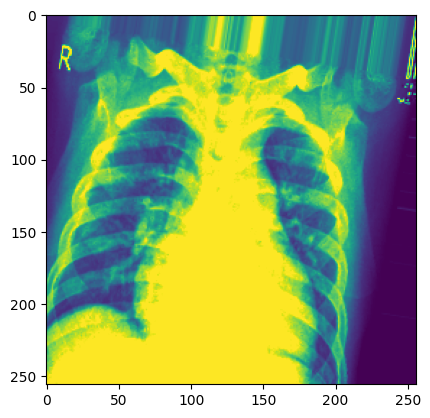

(32, 256, 256, 1)


(32, 256, 256, 1)


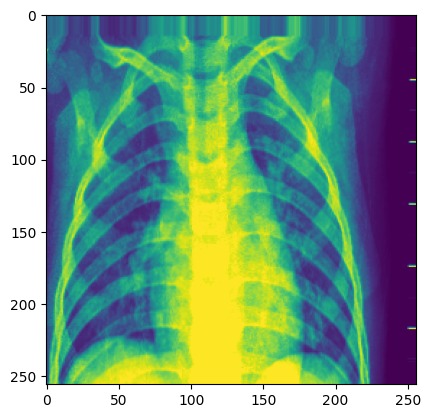

(32, 256, 256, 1)


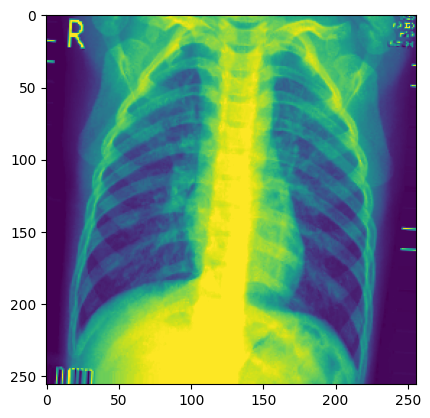

(32, 256, 256, 1)


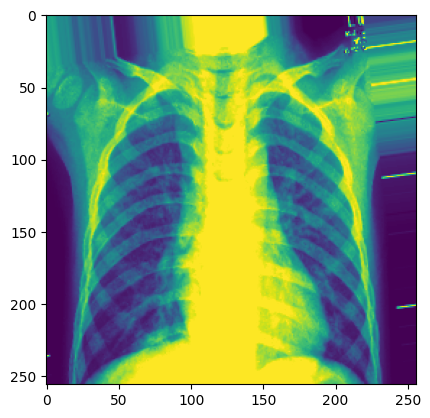

(32, 256, 256, 1)


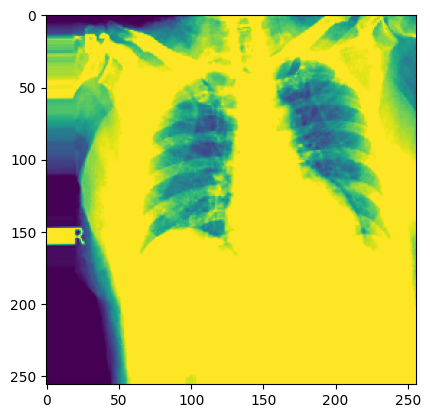

(32, 256, 256, 1)


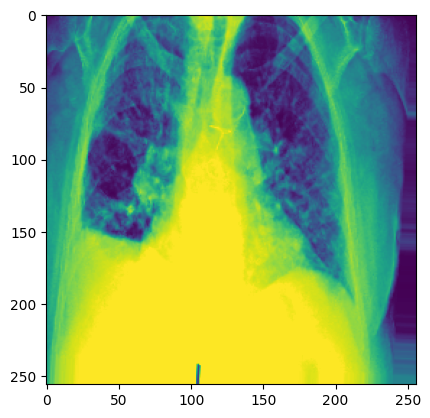

(32, 256, 256, 1)


(32, 256, 256, 1)


(32, 256, 256, 1)


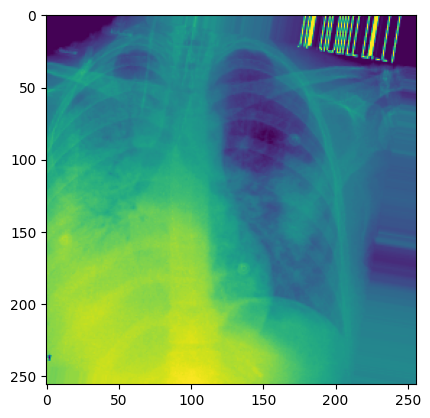

(32, 256, 256, 1)


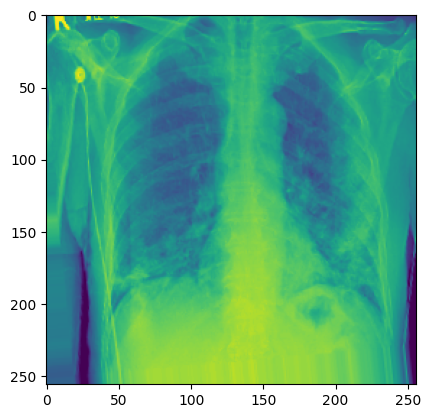

(32, 256, 256, 1)


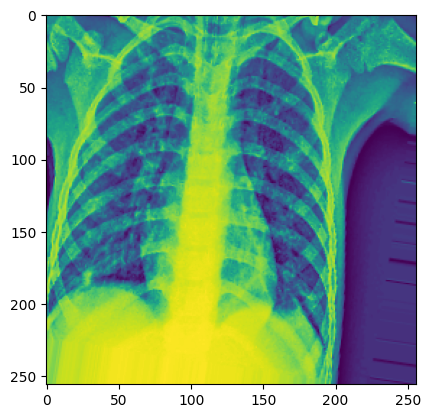

(32, 256, 256, 1)


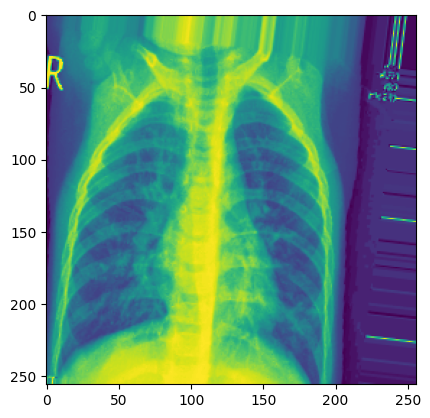

(32, 256, 256, 1)


(32, 256, 256, 1)


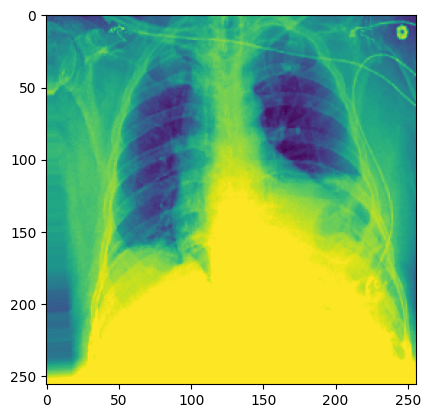

(32, 256, 256, 1)


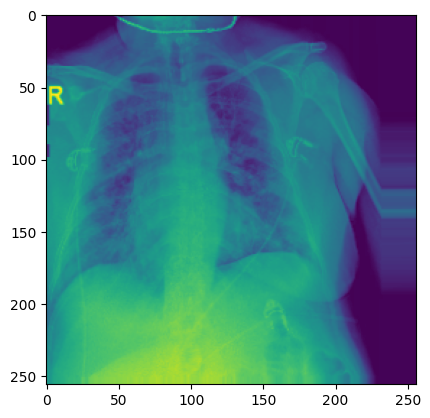

(32, 256, 256, 1)


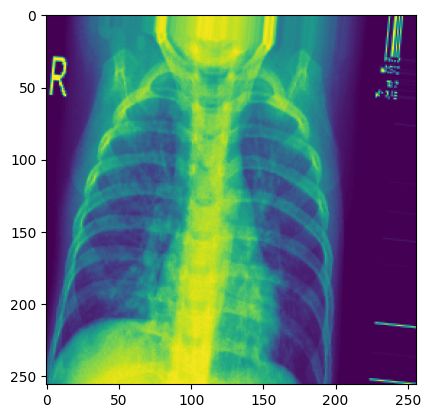

(32, 256, 256, 1)


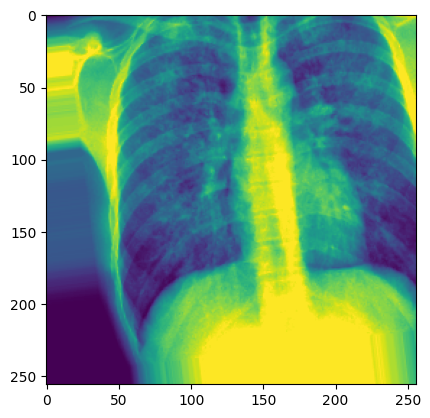

(32, 256, 256, 1)


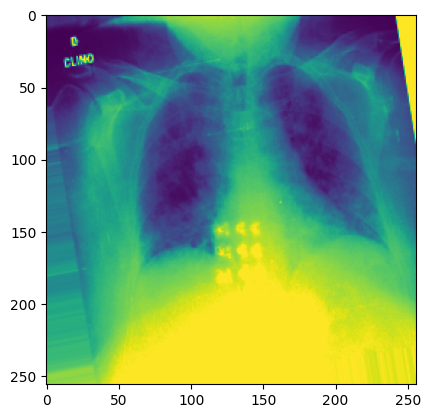

(32, 256, 256, 1)


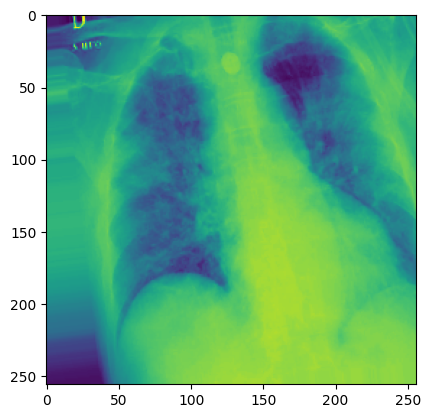

(32, 256, 256, 1)


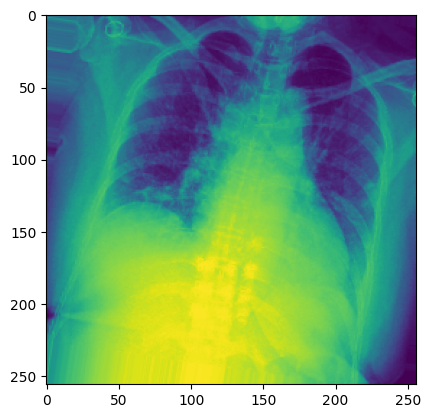

(32, 256, 256, 1)


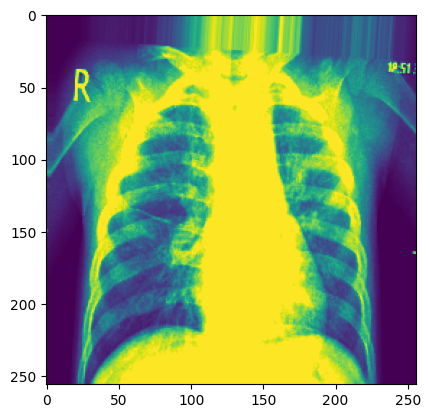

(32, 256, 256, 1)


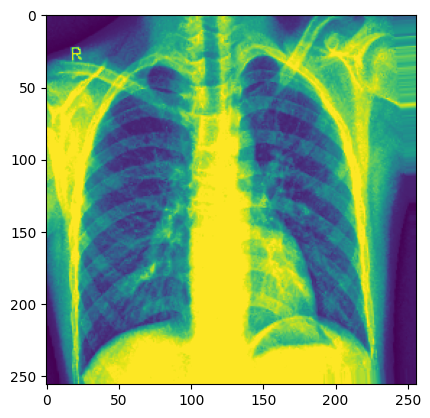

(32, 256, 256, 1)


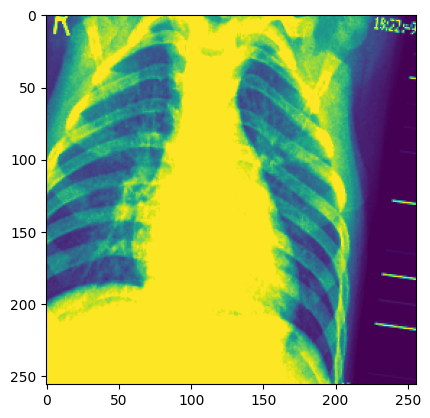

(32, 256, 256, 1)


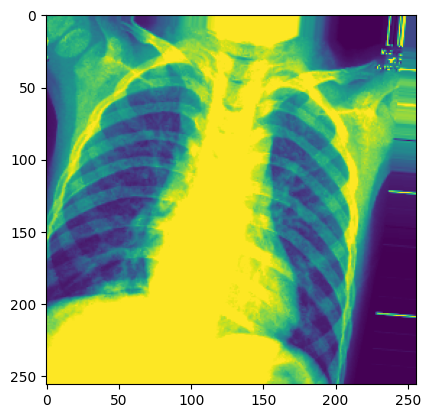

(32, 256, 256, 1)


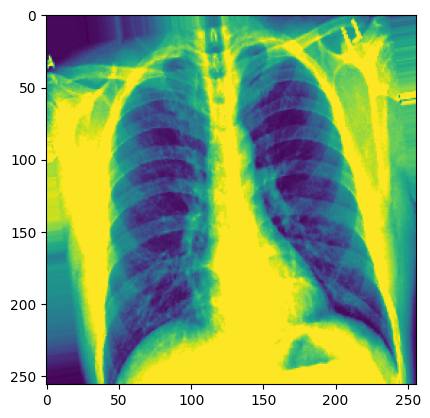

(32, 256, 256, 1)


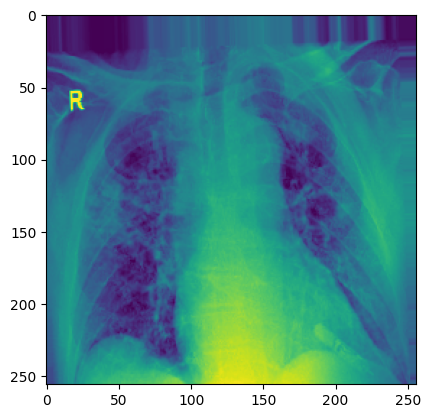

(32, 256, 256, 1)


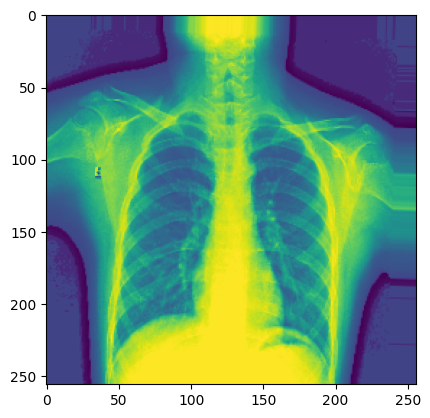

In [12]:
# Discovering Datasets
batch_size = 32
for i in range(batch_size):
    img, labels = train_data.next()
    if img.shape[0] == 32:
        print(img.shape)
        plt.imshow(np.squeeze(img[i]))#remove dimension to print images
        plt.show()

In [13]:
tf.test.gpu_device_name()

'/device:GPU:0'

## Building our CNN Model
***
Librairies

In [14]:
from keras.models import Sequential

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras import layers, Input
from keras.losses import CategoricalCrossentropy
from keras.layers import Conv2D, Dense, Flatten,MaxPooling2D, GlobalAveragePooling2D
from keras.metrics import CategoricalAccuracy
from keras.optimizers import  Adam
from keras.utils import plot_model

### Building

In [15]:
# Build the model

model = Sequential()
# Input Layer
model.add(Input(shape=(256, 256, 1)))
# 1st convolution layer
model.add(Conv2D(16, 3, strides=1, activation="relu", padding='same'))
#max pooling layer
model.add(MaxPooling2D(pool_size=(3, 3)))
# 2nd convolution layer
model.add(Conv2D(32, 3, strides=1, activation="relu"))
#max pooling layer
model.add(MaxPooling2D(pool_size=(3,3)))
# 3rd convolution layer
model.add(Conv2D(16, 5, strides=2, activation="relu"))
#max pooling layer
model.add(MaxPooling2D(pool_size=(3, 3)))
# FLatten
model.add(Flatten())
model.add(Dense(32, activation='relu'))
# Output Layer
model.add(Dense(3, activation="softmax"))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),loss=CategoricalCrossentropy(),metrics=[CategoricalAccuracy()])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 83, 83, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        12816     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

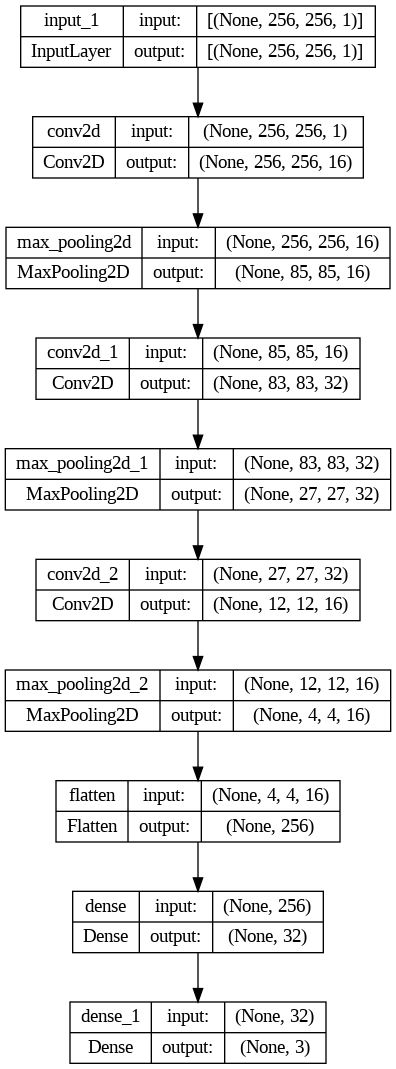

In [16]:
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [17]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', verbose=0, patience=10, factor=0.2)

### Fitting the model

In [18]:
history = model.fit(train_data, epochs = 300,steps_per_epoch=train_data.samples/batch_size,validation_data= test_data, callbacks=reduce_lr)

Epoch 1/300
7/7 [==============================] - 54s 6s/step - loss: 1.0719 - categorical_accuracy: 0.4024 - val_loss: 0.9662 - val_categorical_accuracy: 0.5303 - lr: 0.0050
Epoch 2/300
7/7 [==============================] - 3s 377ms/step - loss: 0.8660 - categorical_accuracy: 0.5697 - val_loss: 0.7089 - val_categorical_accuracy: 0.6970 - lr: 0.0050
Epoch 3/300
7/7 [==============================] - 3s 368ms/step - loss: 0.5878 - categorical_accuracy: 0.7809 - val_loss: 0.5085 - val_categorical_accuracy: 0.7727 - lr: 0.0050
Epoch 4/300
7/7 [==============================] - 4s 547ms/step - loss: 0.6198 - categorical_accuracy: 0.7450 - val_loss: 0.4333 - val_categorical_accuracy: 0.8182 - lr: 0.0050
Epoch 5/300
7/7 [==============================] - 3s 394ms/step - loss: 0.4610 - categorical_accuracy: 0.8088 - val_loss: 0.5198 - val_categorical_accuracy: 0.7879 - lr: 0.0050
Epoch 6/300
7/7 [==============================] - 3s 379ms/step - loss: 0.4360 - categorical_accuracy: 0.8088 -

# **Model Evaluation**
***
Visualizing loss parameters

Text(0, 0.5, 'Categorical Accuracy')

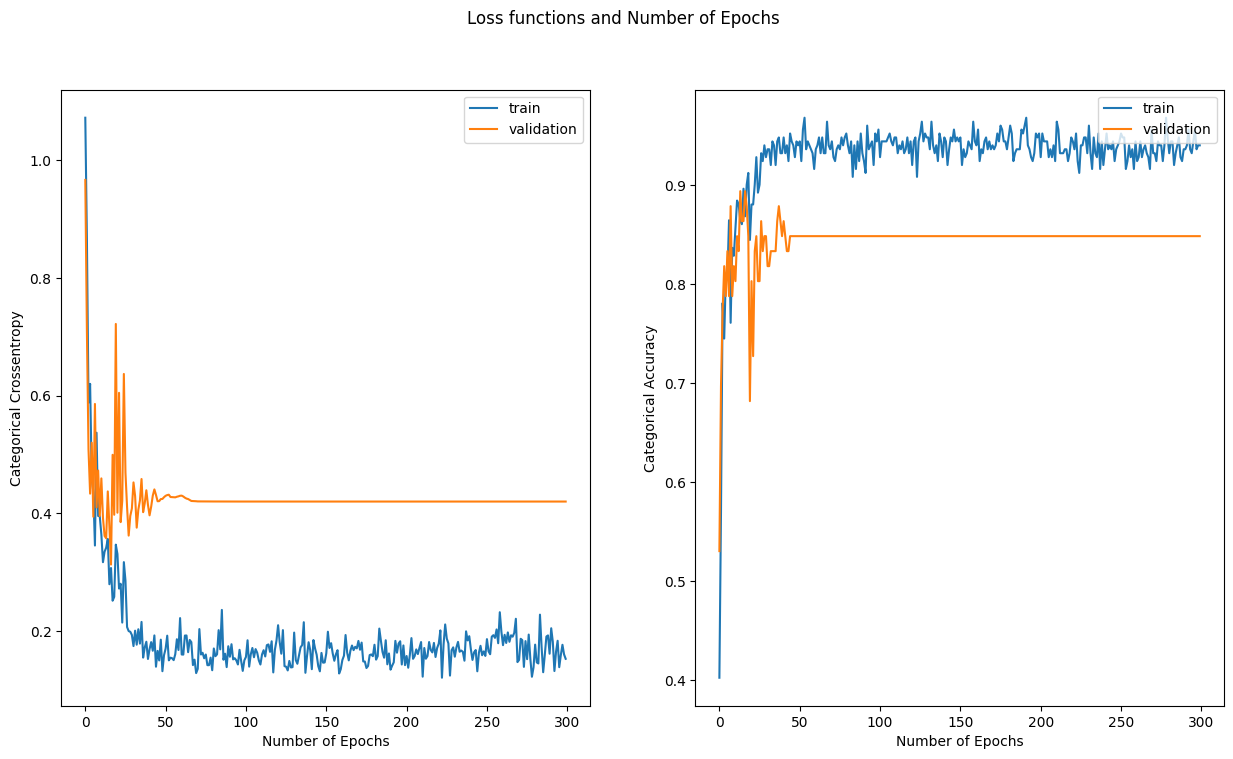

In [19]:
#Visualizing the loss parameters

fig, axs = plt.subplots(1,2, figsize=(15, 8))
plt.suptitle('Loss functions and Number of Epochs')
(ax1, ax2) = axs

#1st plot : Categorical Crossentropy vs epochs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend(loc="upper right")
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Categorical Crossentropy')

#2nd plot : Categorical accuracy vs epochs
ax2.plot(history.history['categorical_accuracy'], label='train')
ax2.plot(history.history['val_categorical_accuracy'], label='validation')
ax2.legend(loc="upper right")
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Categorical Accuracy')

## **Confusion matrix**
***

In [20]:
from sklearn.metrics import classification_report,  confusion_matrix, f1_score
import seaborn as sns

3/3 [==============================] - 0s 80ms/step - loss: 0.4199 - categorical_accuracy: 0.8485
0.41990411281585693

The categorical accuracy or how often the predictions match the labels is 85%

3/3 [==============================] - 1s 144ms/step
The predicted values are:
[0 0 0 0 2 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2]

The actual values are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.80      0.80      0.80        20
           2       0.74      0.85      0.79        20

    accuracy                           0.85        66
   macro avg       0.85      0.84      0.84        66
weighted avg       0.86      0.85      0.85        66



[Text(0, 0.5, 'Covid'), Text(0, 1.5, 'Normal'), Text(0, 2.5, 'Pneumonia')]

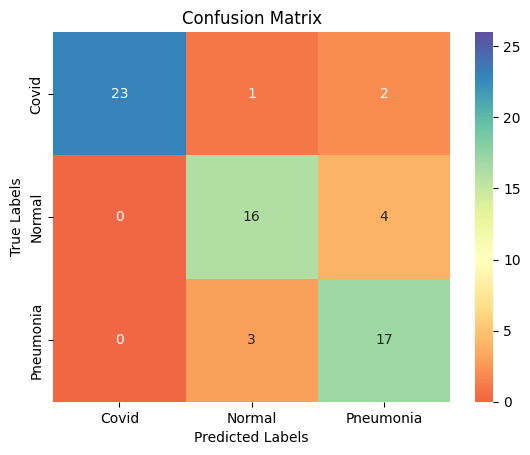

In [21]:
#evaluating the model
loss, acc = model.evaluate(test_data)
print(loss)
print('')
print('The categorical accuracy or how often the predictions match the labels is ' + f'{acc*100:.{0}f}' + '%')
print('')
#getting predictions for futher evaluation
preds = model.predict(test_data)
preds = np.argmax(preds, axis=1)
#looking at the values that were predicted and the true values
print('The predicted values are:')
print(preds)
print('')
print('The actual values are:')
print(test_data.classes)
print('')
print('Classification Report:')
print(classification_report(test_data.classes, preds, labels=[0,1,2]))

#creating confusion matrix plot with sns
cm=confusion_matrix(test_data.classes, preds)
ax = plt.subplot()
sns.heatmap(cm, vmin=0, vmax=26, center=10, cmap="Spectral", annot=True)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Covid', 'Normal', "Pneumonia"])
ax.yaxis.set_ticklabels(['Covid', 'Normal', "Pneumonia"])